# Part I The Paper, Data, and Code

- **Paper**: Cen, Jiazhong, Zanwei Zhou, Jiemin Fang, Chen Yang, Wei Shen, Lingxi Xie, Xiaopeng Zhang, and Qi Tian. 2023. "Segment Anything in 3D with NeRFs." In Proceedings of the Conference on Neural Information Processing Systems (NeurIPS). https://proceedings.neurips.cc/paper_files/paper/2023/hash/

- **Data**: https://huggingface.co/spaces/sam-hq-team/sam-hq

- **Code** : https://github.com/SysCV/sam-hq

###Brief Description
This paper introduces a novel framework called SA3D (Segment Anything in 3D), designed to extend the capabilities of the 2D segmentation model, Segment Anything Model (SAM), to 3D object segmentation. Instead of building a 3D foundation model from scratch, SA3D leverages Neural Radiance Fields (NeRFs) as a 3D structural prior. The method requires a manual segmentation prompt in a single view to generate a 2D mask with SAM. This mask is then iteratively refined through mask inverse rendering and cross-view self-prompting across multiple views to construct a complete 3D segmentation of the target object.

###Key Contributions:

- **Efficient 3D Segmentation**: SA3D extends 2D segmentation models into the 3D domain by utilizing NeRFs, significantly reducing the need for costly 3D data acquisition and annotation.
- **Innovative Self-Prompting Mechanism**: The cross-view self-prompting strategy automatically generates prompts, minimizing the need for manual input and enhancing automation in 3D segmentation.
- **Versatile Application**: The method adapts seamlessly to various scenes without requiring retraining of SAM or NeRF, providing quick and efficient 3D segmentation results.
- **Resource Efficiency**: By employing pre-trained NeRF models, SA3D offers a resource-efficient approach for extending 2D vision models to 3D, bypassing the need for extensive 3D data collection.
- **Open-Source Code**: The authors provide open-source code, facilitating reproducibility and further research in the field.

# Part II: Reproduce The Targetted Figure for Redesign

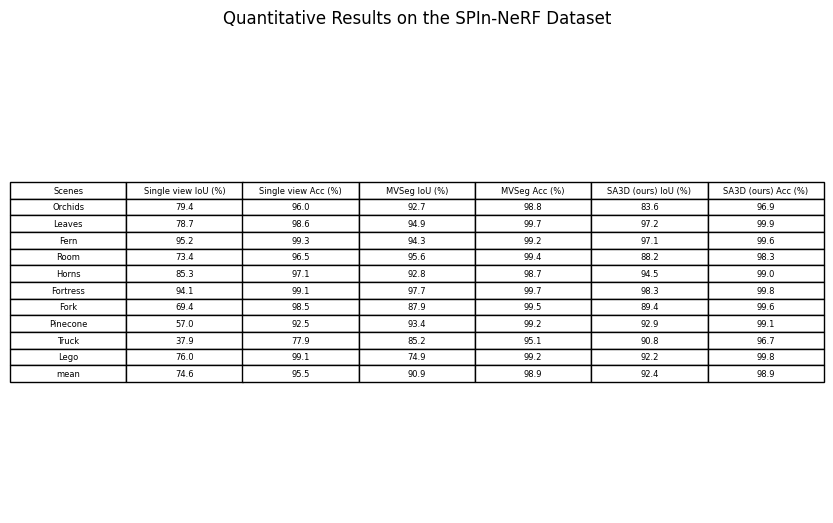

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Data for the table
data = {
    "Scenes": ["Orchids", "Leaves", "Fern", "Room", "Horns", "Fortress", "Fork", "Pinecone", "Truck", "Lego", "mean"],
    "Single view IoU (%)": [79.4, 78.7, 95.2, 73.4, 85.3, 94.1, 69.4, 57.0, 37.9, 76.0, 74.6],
    "Single view Acc (%)": [96.0, 98.6, 99.3, 96.5, 97.1, 99.1, 98.5, 92.5, 77.9, 99.1, 95.5],
    "MVSeg IoU (%)": [92.7, 94.9, 94.3, 95.6, 92.8, 97.7, 87.9, 93.4, 85.2, 74.9, 90.9],
    "MVSeg Acc (%)": [98.8, 99.7, 99.2, 99.4, 98.7, 99.7, 99.5, 99.2, 95.1, 99.2, 98.9],
    "SA3D (ours) IoU (%)": [83.6, 97.2, 97.1, 88.2, 94.5, 98.3, 89.4, 92.9, 90.8, 92.2, 92.4],
    "SA3D (ours) Acc (%)": [96.9, 99.9, 99.6, 98.3, 99.0, 99.8, 99.6, 99.1, 96.7, 99.8, 98.9]
}

# Create DataFrame
df = pd.DataFrame(data)

# Plotting the table
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('tight')
ax.axis('off')
ax.table(cellText=df.values, colLabels=df.columns, cellLoc='center', loc='center', colWidths=[0.15] * len(df.columns))

plt.title('Quantitative Results on the SPIn-NeRF Dataset', pad=20)
plt.show()

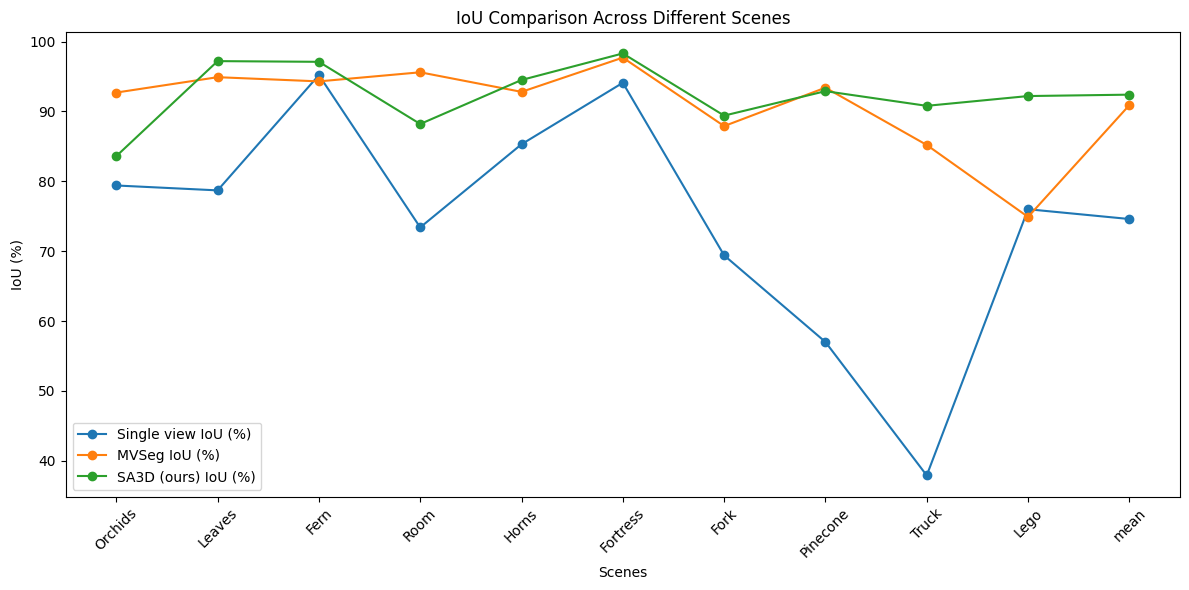

In [8]:
import matplotlib.pyplot as plt

# Data for the plot
scenes = ["Orchids", "Leaves", "Fern", "Room", "Horns", "Fortress", "Fork", "Pinecone", "Truck", "Lego", "mean"]
single_view_iou = [79.4, 78.7, 95.2, 73.4, 85.3, 94.1, 69.4, 57.0, 37.9, 76.0, 74.6]
mvseg_iou = [92.7, 94.9, 94.3, 95.6, 92.8, 97.7, 87.9, 93.4, 85.2, 74.9, 90.9]
sa3d_iou = [83.6, 97.2, 97.1, 88.2, 94.5, 98.3, 89.4, 92.9, 90.8, 92.2, 92.4]

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(scenes, single_view_iou, marker='o', label='Single view IoU (%)')
plt.plot(scenes, mvseg_iou, marker='o', label='MVSeg IoU (%)')
plt.plot(scenes, sa3d_iou, marker='o', label='SA3D (ours) IoU (%)')

# Adding titles and labels
plt.title('IoU Comparison Across Different Scenes')
plt.xlabel('Scenes')
plt.ylabel('IoU (%)')
plt.xticks(rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Part III: Evaluation Based on 4-Levels of Design by ChatGPT with Prompt Engineering Techniques


### Revised Analysis and Redesign Suggestions

#### 1. Domain Situation
**Current Design Analysis:**  
- **Target Audience**: This visualization is intended for researchers, practitioners, and students in the fields of computer vision and 3D modeling. These users are expected to be familiar with metrics like Intersection over Union (IoU) and segmentation tasks.
- **Needs**: The audience needs to compare the performance of different segmentation methods (Single View, MVSeg, SA3D) across various scenes. They are looking for insights into which method performs best in different scenarios and the overall reliability of these methods.

**Suggested Improvement:**  
- **Broader Audience Consideration**: To accommodate users with less technical expertise, brief explanations of IoU and its significance could be added as annotations or in a legend. For advanced users, providing interactive elements such as the ability to filter scenes or methods could enhance usability.

#### 2. Data/Task Abstraction
**Current Design Analysis:**  
- **Data Representation**: The visualization represents IoU scores across different scenes for three methods. The task is to compare and identify trends, strengths, and weaknesses of each method.
- **Task Fit**: The line chart is effective for showing trends and comparisons over discrete categories (scenes).

**Suggested Improvement:**  
- **Highlighting Key Insights**: Adding annotations to indicate key observations, like the best-performing method per scene or anomalies, would make the insights clearer. A summary table below the plot could also help users quickly understand overall performance.

#### 3. Visual Encoding/Interaction Idiom and Algorithm
**Current Design Analysis:**  
- **Encoding Choices:** Line chart with different colors and markers for each method is suitable for comparative trend analysis. Axes are clearly labeled, and the use of markers helps highlight specific data points.
- **Interaction**: The plot is static. While effective for printed or non-interactive digital media, it lacks interactivity that could help users explore data more deeply.

**Suggested Improvement:**  
- **Enhance Interactivity**: In a digital environment, adding interactivity like tooltips showing exact values, filtering options, and zooming capabilities could enhance user engagement and understanding.
- **Color Differentiation**: Ensure colors are distinct and accessible, even for users with color vision deficiencies.

#### 4. Qualitative and Quantitative Analysis
**Current Design Analysis:**  
- **Qualitative Feedback**: The chart is visually clear and allows for easy comparison. However, without interactive elements, deeper insights might require manual calculation or cross-referencing.
- **Quantitative Metrics**: If user studies were conducted, metrics like time to complete comparison tasks or accuracy in identifying the best method per scene would be valuable.

**Suggested Improvement:**  
- **User Testing**: Conduct user testing to gather feedback on how easily and accurately users can extract insights. Measure task completion time and error rates to quantify the effectiveness of the visualization.
- **Iterative Refinement**: Based on feedback, iterate on the design to address any identified pain points, such as difficulty in distinguishing lines or interpreting overlapping data points.


### Summary of the Revised Redesign:
1. **Original Design (Top):**
- **Lacks Point Annotations**: The original chart does not include specific numerical annotations for each data point, requiring users to estimate IoU values based on the y-axis.
- **Basic Font and Layout**: Uses default font sizes for labels and titles, which may be less visually prominent and slightly harder to read, especially for users reviewing the chart quickly.
- **No Grid Lines**: The absence of grid lines makes it slightly harder to align data points across the x-axis and y-axis for precise comparisons.
- **Simple Legend and Labels**: The legend and axis labels are straightforward but could benefit from more emphasis to enhance quick readability.

2. **Redesigned Chart (Bottom):**
- **Includes Point Annotations**: Each data point is now annotated with its exact IoU value, providing immediate clarity and saving users the effort of estimating from the axis.
- **Enhanced Font and Layout**: The font sizes for the title, axis labels, and ticks are increased, making the chart easier to read. The tight_layout ensures better spacing and prevents overlapping, offering a cleaner presentation.
- **Grid Lines Added**: Horizontal grid lines improve the user's ability to align and compare IoU values across different scenes, enhancing data interpretation.
- **Refined Legend and Labels**: The legend is more visually distinct, with a slightly larger font, aiding in quicker differentiation between the methods being compared.

The redesigned visualization significantly improves usability by incorporating numerical annotations, optimizing the layout, and enhancing readability through better font sizing and grid lines. These changes reduce cognitive load and help users extract insights more efficiently.

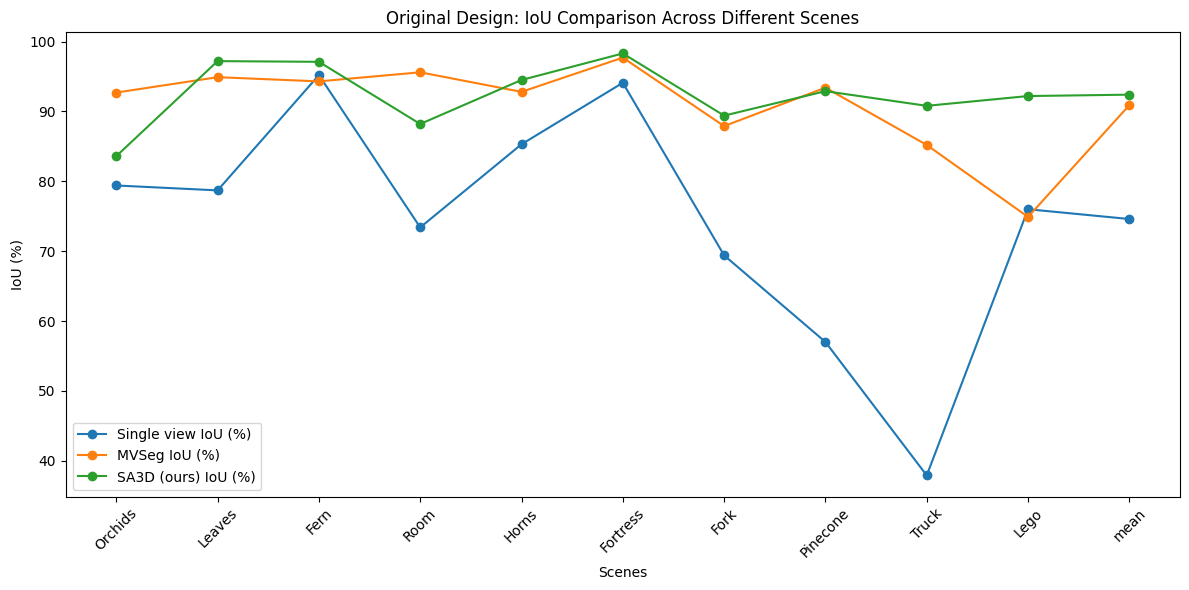

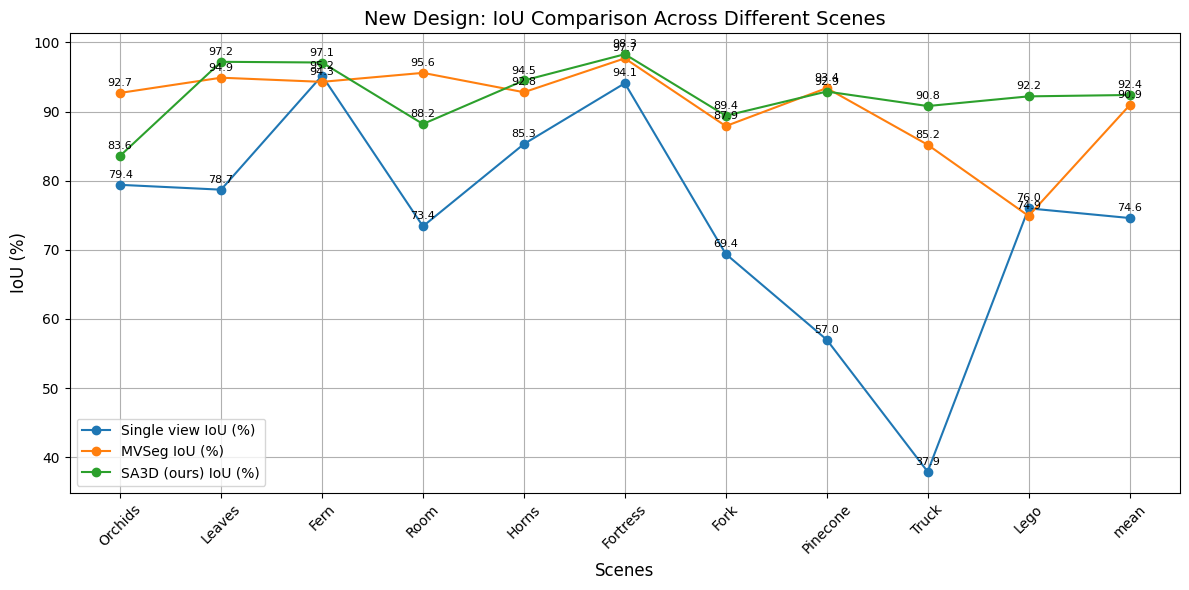

In [9]:
import matplotlib.pyplot as plt

# Data for the plot
scenes = ["Orchids", "Leaves", "Fern", "Room", "Horns", "Fortress", "Fork", "Pinecone", "Truck", "Lego", "mean"]
single_view_iou = [79.4, 78.7, 95.2, 73.4, 85.3, 94.1, 69.4, 57.0, 37.9, 76.0, 74.6]
mvseg_iou = [92.7, 94.9, 94.3, 95.6, 92.8, 97.7, 87.9, 93.4, 85.2, 74.9, 90.9]
sa3d_iou = [83.6, 97.2, 97.1, 88.2, 94.5, 98.3, 89.4, 92.9, 90.8, 92.2, 92.4]

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(scenes, single_view_iou, marker='o', label='Single view IoU (%)')
plt.plot(scenes, mvseg_iou, marker='o', label='MVSeg IoU (%)')
plt.plot(scenes, sa3d_iou, marker='o', label='SA3D (ours) IoU (%)')

# Adding titles and labels
plt.title('Original Design: IoU Comparison Across Different Scenes')
plt.xlabel('Scenes')
plt.ylabel('IoU (%)')
plt.xticks(rotation=45)
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

# Data for the plot
scenes = ["Orchids", "Leaves", "Fern", "Room", "Horns", "Fortress", "Fork", "Pinecone", "Truck", "Lego", "mean"]
single_view_iou = [79.4, 78.7, 95.2, 73.4, 85.3, 94.1, 69.4, 57.0, 37.9, 76.0, 74.6]
mvseg_iou = [92.7, 94.9, 94.3, 95.6, 92.8, 97.7, 87.9, 93.4, 85.2, 74.9, 90.9]
sa3d_iou = [83.6, 97.2, 97.1, 88.2, 94.5, 98.3, 89.4, 92.9, 90.8, 92.2, 92.4]

# Enhancing the plot with interactivity and additional information
plt.figure(figsize=(12, 6))
plt.plot(scenes, single_view_iou, marker='o', label='Single view IoU (%)')
plt.plot(scenes, mvseg_iou, marker='o', label='MVSeg IoU (%)')
plt.plot(scenes, sa3d_iou, marker='o', label='SA3D (ours) IoU (%)')

# Adding titles, labels, and annotations
plt.title('New Design: IoU Comparison Across Different Scenes', fontsize=14)
plt.xlabel('Scenes', fontsize=12)
plt.ylabel('IoU (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.grid(True)

# Adding annotations to highlight significant points
for i, scene in enumerate(scenes):
    plt.annotate(f'{single_view_iou[i]:.1f}', (scene, single_view_iou[i]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
    plt.annotate(f'{mvseg_iou[i]:.1f}', (scene, mvseg_iou[i]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)
    plt.annotate(f'{sa3d_iou[i]:.1f}', (scene, sa3d_iou[i]), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=8)

# Enhancing readability with tight layout
plt.tight_layout()

# Display the plot
plt.show()
